# Data Cleaning Notebook
This notebook demonstrates the data cleaning process for the student dataset.

In [2]:
# Import required libraries
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Add src directory to path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from data_cleaning import DataCleaner

## Load and Explore Raw Data

In [3]:
# Define file paths
raw_data_path = os.path.join('..', 'data', 'raw', 'students_raw.csv')
output_path = os.path.join('..', 'data', 'students_cleaned.csv')

# Create directories if they don't exist
os.makedirs(os.path.dirname(raw_data_path), exist_ok=True)
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Initialize the data cleaner
cleaner = DataCleaner(raw_data_path)

# Get the raw data
df = cleaner.df

# Display basic information
print("Raw Data Info:")
df.info()

# Display first few rows
print("\nFirst 5 rows of raw data:")
df.head()

Raw Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student_id          500 non-null    object 
 1   first_name          495 non-null    object 
 2   last_name           493 non-null    object 
 3   gender              497 non-null    object 
 4   email               497 non-null    object 
 5   age                 500 non-null    int64  
 6   study_hours         468 non-null    float64
 7   quiz_participation  467 non-null    float64
 8   past_performance    480 non-null    float64
 9   course_completion   488 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 39.2+ KB

First 5 rows of raw data:


,student_id,first_name,last_name,gender,email,age,study_hours,quiz_participation,past_performance,course_completion
0,S001,Benjamin,Kiernan,Male,x001@student.ncirl.ie,20,12.14,89.0,95.0,NaN
1,S002,Callan,McVicker,Male,x002@student.ncirl.ie,25,9.37,86.9,56.0,True
2,S003,Fintan,Deere,Male,x003@student.ncirl.ie,20,12.79,82.7,60.0,False
3,S004,Sorcha,Cally,Female,x004@student.ncirl.ie,21,9.28,65.6,57.0,False
4,S005,Kane,Swift,Male,x005@student.ncirl.ie,29,7.78,95.8,51.0,True


## Clean and Preprocess Data

In [8]:
# Initialize the data cleaner
cleaner = DataCleaner(csv_path=raw_data_path)

# Apply cleaning steps in sequence
cleaner.remove_duplicates()      # Remove duplicate rows
cleaner.convert_types()          # Convert data types
cleaner.handle_missing_values()  # Handle missing values
cleaner.correct_anomalies()      # Fix any data anomalies
cleaner.normalize_columns()      # Normalize study hours
cleaner.create_engagement()      # Create engagement score
cleaner.bucket_age()             # Create age buckets

# Get the cleaned data
cleaned_df = cleaner.df

# Display information about cleaned data
print("Cleaned Data Info:")
cleaned_df.info()

# Display summary statistics
print("\nSummary Statistics:")
print(cleaned_df.describe(include='all').T)

# Show first few rows of cleaned data
print("\nFirst 5 rows of cleaned data:")
print(cleaned_df.head())

Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   student_id          500 non-null    object  
 1   first_name          495 non-null    object  
 2   last_name           493 non-null    object  
 3   gender              500 non-null    category
 4   email               500 non-null    object  
 5   age                 500 non-null    int64   
 6   study_hours         500 non-null    float64 
 7   quiz_participation  500 non-null    float64 
 8   past_performance    500 non-null    float64 
 9   course_completion   500 non-null    bool    
 10  study_hours_norm    500 non-null    float64 
 11  engagement          500 non-null    float64 
 12  age_bucket          500 non-null    category
dtypes: bool(1), category(2), float64(5), int64(1), object(4)
memory usage: 41.0+ KB

Summary Statistics:
                    

## Handle Missing Values

Missing values in each column:
student_id            0
first_name            5
last_name             7
gender                0
email                 0
age                   0
study_hours           0
quiz_participation    0
past_performance      0
course_completion     0
study_hours_norm      0
engagement            0
age_bucket            0
dtype: int64


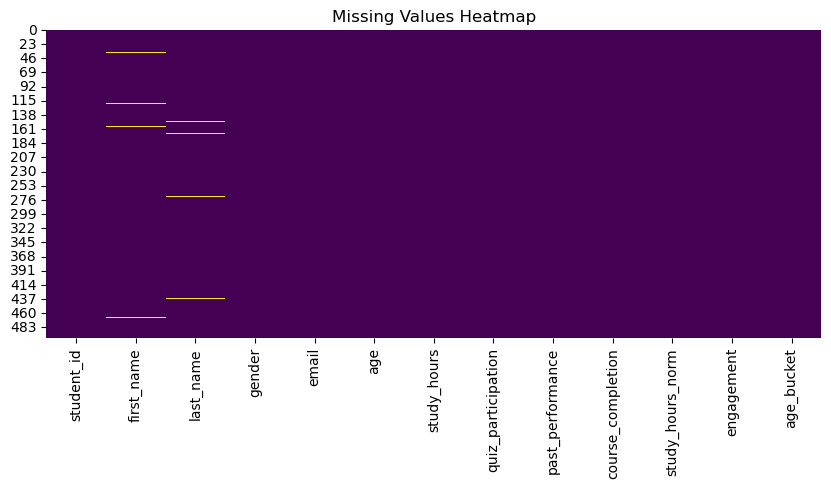

In [9]:
# Check for missing values
print("Missing values in each column:")
print(cleaned_df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 4))
sns.heatmap(cleaned_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Feature Engineering

In [10]:
# Check for and create age buckets if not already created
if 'age_bucket' not in cleaned_df.columns:
    # Create age buckets
    bins = [0, 18, 25, 35, 50, 100]
    labels = ['<18', '18-24', '25-34', '35-50', '50+']
    cleaned_df['age_bucket'] = pd.cut(cleaned_df['age'], bins=bins, labels=labels, right=False)

# Display the distribution of the new features
print("Age Distribution:")
print(cleaned_df['age_bucket'].value_counts().sort_index())

# Display first few rows with new features
print("\nFirst 5 rows with engineered features:")
cleaned_df.head()

Age Distribution:
age_bucket
19-24    417
25-34     83
35-45      0
46+        0
Name: count, dtype: int64

First 5 rows with engineered features:


,student_id,first_name,last_name,gender,email,age,study_hours,quiz_participation,past_performance,course_completion,study_hours_norm,engagement,age_bucket
0,S001,Benjamin,Kiernan,Male,x001@student.ncirl.ie,20,12.14,89.0,95.0,False,0.513428,0.664057,19-24
1,S002,Callan,McVicker,Male,x002@student.ncirl.ie,25,9.37,86.9,56.0,True,0.396278,0.585367,25-34
2,S003,Fintan,Deere,Male,x003@student.ncirl.ie,20,12.79,82.7,60.0,False,0.540918,0.655351,19-24
3,S004,Sorcha,Cally,Female,x004@student.ncirl.ie,21,9.28,65.6,57.0,False,0.392472,0.497883,19-24
4,S005,Kane,Swift,Male,x005@student.ncirl.ie,29,7.78,95.8,51.0,True,0.329034,0.580620,25-34


## Save Cleaned Data

In [11]:
# Ensure the output directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Save the cleaned data
cleaned_df.to_csv(output_path, index=False)
print(f"Cleaned data saved to {output_path}")

# Display the final structure
print("\nFinal data structure:")
cleaned_df.info()

Cleaned data saved to ..\data\students_cleaned.csv

Final data structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   student_id          500 non-null    object  
 1   first_name          495 non-null    object  
 2   last_name           493 non-null    object  
 3   gender              500 non-null    category
 4   email               500 non-null    object  
 5   age                 500 non-null    int64   
 6   study_hours         500 non-null    float64 
 7   quiz_participation  500 non-null    float64 
 8   past_performance    500 non-null    float64 
 9   course_completion   500 non-null    bool    
 10  study_hours_norm    500 non-null    float64 
 11  engagement          500 non-null    float64 
 12  age_bucket          500 non-null    category
dtypes: bool(1), category(2), float64(5), int64(1), object(4)
memory us

## Data Quality Check

In [12]:
# Check for any remaining issues
print("Data Quality Check:")
print("\n1. Missing values in each column:")
print(cleaned_df.isnull().sum())

print("\n2. Duplicate rows:", cleaned_df.duplicated().sum())

print("\n3. Data types:")
print(cleaned_df.dtypes)

# Display basic statistics of numerical columns
print("\n4. Basic statistics:")
print(cleaned_df.describe())

Data Quality Check:

1. Missing values in each column:
student_id            0
first_name            5
last_name             7
gender                0
email                 0
age                   0
study_hours           0
quiz_participation    0
past_performance      0
course_completion     0
study_hours_norm      0
engagement            0
age_bucket            0
dtype: int64

2. Duplicate rows: 0

3. Data types:
student_id              object
first_name              object
last_name               object
gender                category
email                   object
age                      int64
study_hours            float64
quiz_participation     float64
past_performance       float64
course_completion         bool
study_hours_norm       float64
engagement             float64
age_bucket            category
dtype: object

4. Basic statistics:
              age  study_hours  quiz_participation  past_performance  \
count  500.000000   500.000000          500.000000        500.000000   